In [28]:
from scipy.signal import argrelextrema as get_extrema_indices
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [29]:
file = open('/Users/avivafranklin/Desktop/Berk/PHYSICS 5BL/faradayslaw.csv', 'r')
print(file.read())

Time (s),ωy (rad/s),Voltage (mV)
0.009999999776482582,-0.4329570531845093,-0.010989011265337467
0.019999999552965164,0.5008224844932556,-0.007326007355004549
0.029999999329447746,1.7098203897476196,-0.002616431098431349
0.03999999910593033,2.9203057289123535,0.0010465724626556039
0.05000000074505806,4.7205657958984375,0.0041862898506224155
0.05999999865889549,7.428839206695557,0.007326007355004549
0.07000000029802322,10.723540306091309,0.008895865641534328
0.07999999821186066,14.032594680786133,0.010989011265337467
0.09000000357627869,16.90346336364746,0.013082155957818031
0.10000000149011612,18.646276473999023,0.0141287287697196
0.10999999940395355,19.059066772460938,0.0141287287697196
0.11999999731779099,19.051036834716797,0.013082155957818031
0.12999999523162842,19.074609756469727,0.013605441898107529
0.14000000059604645,19.099409103393555,0.011512297205626965
0.15000000596046448,19.121309280395508,0.011512297205626965
0.1599999964237213,19.14328384399414,0.010465724393725395
0.1700

In [30]:
tx, wydata, Vdata= np.loadtxt("/Users/avivafranklin/Desktop/Berk/PHYSICS 5BL/faradayslaw.csv", delimiter=",", skiprows=2, usecols=(0,1,2), unpack=True)

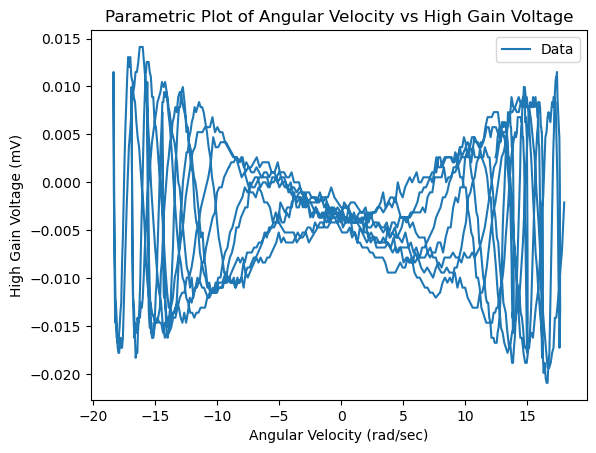

In [31]:
start = 50
end = 1960

t_subset = tx[start:end]
wy_subset = wydata[start:end]
v_subset = Vdata[start:end]
plt.plot(wy_subset, v_subset, label = "Data")
plt.title("Parametric Plot of Angular Velocity vs High Gain Voltage")
plt.xlabel("Angular Velocity (rad/sec)")
plt.ylabel("High Gain Voltage (mV)")
plt.legend(loc="upper right")
plt.show()

In [32]:
neighborhood_size = 5

max_indices = get_extrema_indices(v_subset, np.greater, order=neighborhood_size)
min_indices = get_extrema_indices(v_subset, np.less, order=neighborhood_size)

print("Maxima found: ", np.size(max_indices))
print("Minima found: ", np.size(min_indices))

Maxima found:  32
Minima found:  26


In [33]:
y_max = v_subset[max_indices]
x_max = wy_subset[max_indices]

y_min = v_subset[min_indices]
x_min = wy_subset[min_indices]

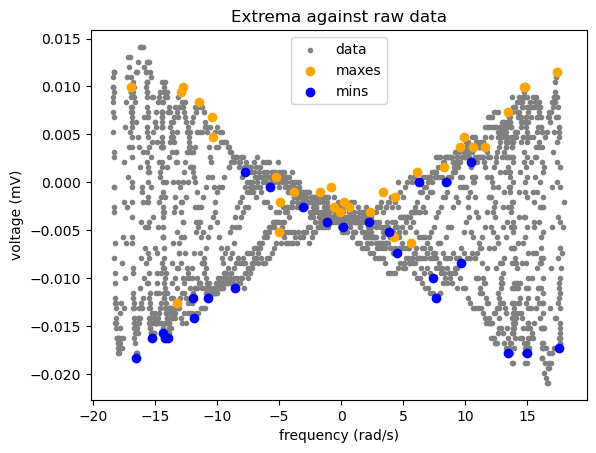

In [34]:
plt.title('Extrema against raw data')
plt.xlabel('frequency (rad/s)')
plt.ylabel('voltage (mV)')
plt.scatter(wy_subset, v_subset, marker='.', color='grey', label='data')
plt.scatter(x_max, y_max, color='orange', label='maxes')
plt.scatter(x_min, y_min, color='blue', label='mins')
plt.legend(loc='upper center')
plt.show()

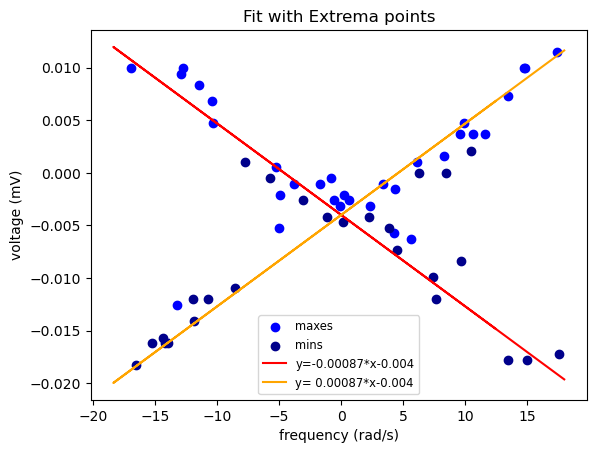

In [35]:
plt.title('Fit with Extrema points')
plt.xlabel('frequency (rad/s)')
plt.ylabel('voltage (mV)')
plt.scatter(x_max, y_max, color='blue', label='maxes')
plt.scatter(x_min, y_min, color='darkblue', label='mins')
plt.plot(wy_subset, -0.00087*wy_subset -0.004, color = 'red', label='y=-0.00087*x-0.004')
plt.plot(wy_subset, 0.00087*wy_subset-0.004, color='orange', label='y= 0.00087*x-0.004')
plt.legend(loc='lower center', fontsize='small')
plt.show()